#Classification with logistic regression

In [13]:
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from plot_2d_separator import plot_2d_separator
import numpy as np
from ipywidgets import interact
import warnings

# initial setup
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 150

plt.style.use('ggplot')
np.random.seed(1)
np.set_printoptions(precision=2, linewidth=100)
warnings.filterwarnings(action='ignore')

(800, 2) (800,)


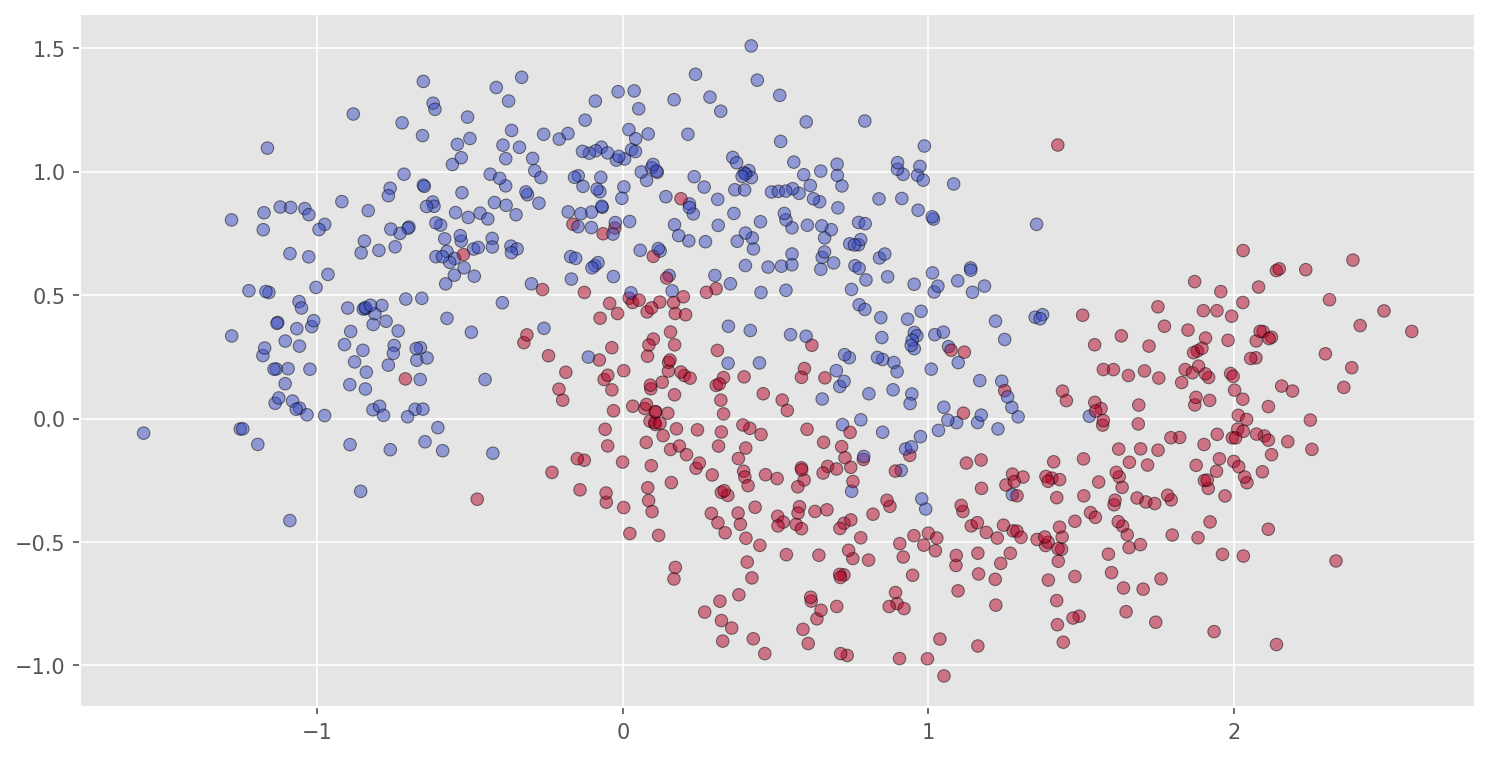

In [10]:
# create random data
X, y = make_moons(n_samples=800, noise=0.25, random_state=0)
print(X.shape, y.shape)

# plot data
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5, edgecolors='k', cmap=plt.cm.coolwarm)
plt.show()

In [15]:
#degree = [1, 2, 3, 5, 7, 9, 12]
coeffs = [1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e10] #coeffs and lambda are in an inverse relation

def moon_calssification( degree=3):
    plt.figure()

    for C in coeffs:
        # create logistic regression classifier
        plt.subplot(2, 4, coeffs.index(C) + 1)
        plt.tight_layout() # for more readability and arrangment of the subplots
        poly_features = PolynomialFeatures(degree=degree, include_bias=False)
        log_reg = LogisticRegression(C=C)
        model = Pipeline([("poly_features", poly_features), ("logistic_regression", log_reg)])
        
        # train classifier
        model.fit(X, y)
        accuracy = model.score(X, y)
        
        # plot classification results
        plot_2d_separator(model, X, fill=True)
        plt.scatter(X[:, 0], X[:, 1], s=15, c=y, alpha=0.5, edgecolors='k', cmap=plt.cm.coolwarm)
        plt.title("C = {:.2e} ({:.2f}%)".format(C, accuracy * 100), fontsize=10)

    plt.show()

interact(moon_calssification, degree = [1, 2, 3, 5, 7, 9, 12])

interactive(children=(Dropdown(description='degree', index=2, options=(1, 2, 3, 5, 7, 9, 12), value=3), Output…

<function __main__.moon_calssification(degree=3)>